In [2]:
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression 


pd.set_option('display.max_columns', None)
%matplotlib inline 

housing = pd.read_csv('Ames_HousePrice.csv', index_col=0)
housing.shape

(2580, 81)

In [3]:
housing.head()

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,BrkTil,TA,TA,No,ALQ,737.0,Unf,0.0,100.0,837.0,GasA,Ex,Y,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,Gd,5,Typ,0,NaN,Detchd,1930.0,Unf,1.0,216.0,TA,Po,N,154,0,42,86,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,Gd,Y,SBrkr,717,322,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1940.0,Unf,1.0,281.0,TA,TA,N,0,0,168,0,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,643.0,Unf,0.0,167.0,810.0,GasA,Ex,Y,SBrkr,810,855,0,1.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,2001.0,Fin,2.0,528.0,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal


In [4]:
housing[housing['GarageType']== 'Detchd']['GarageArea'].mean()

415.6307692307692

<Axes: >

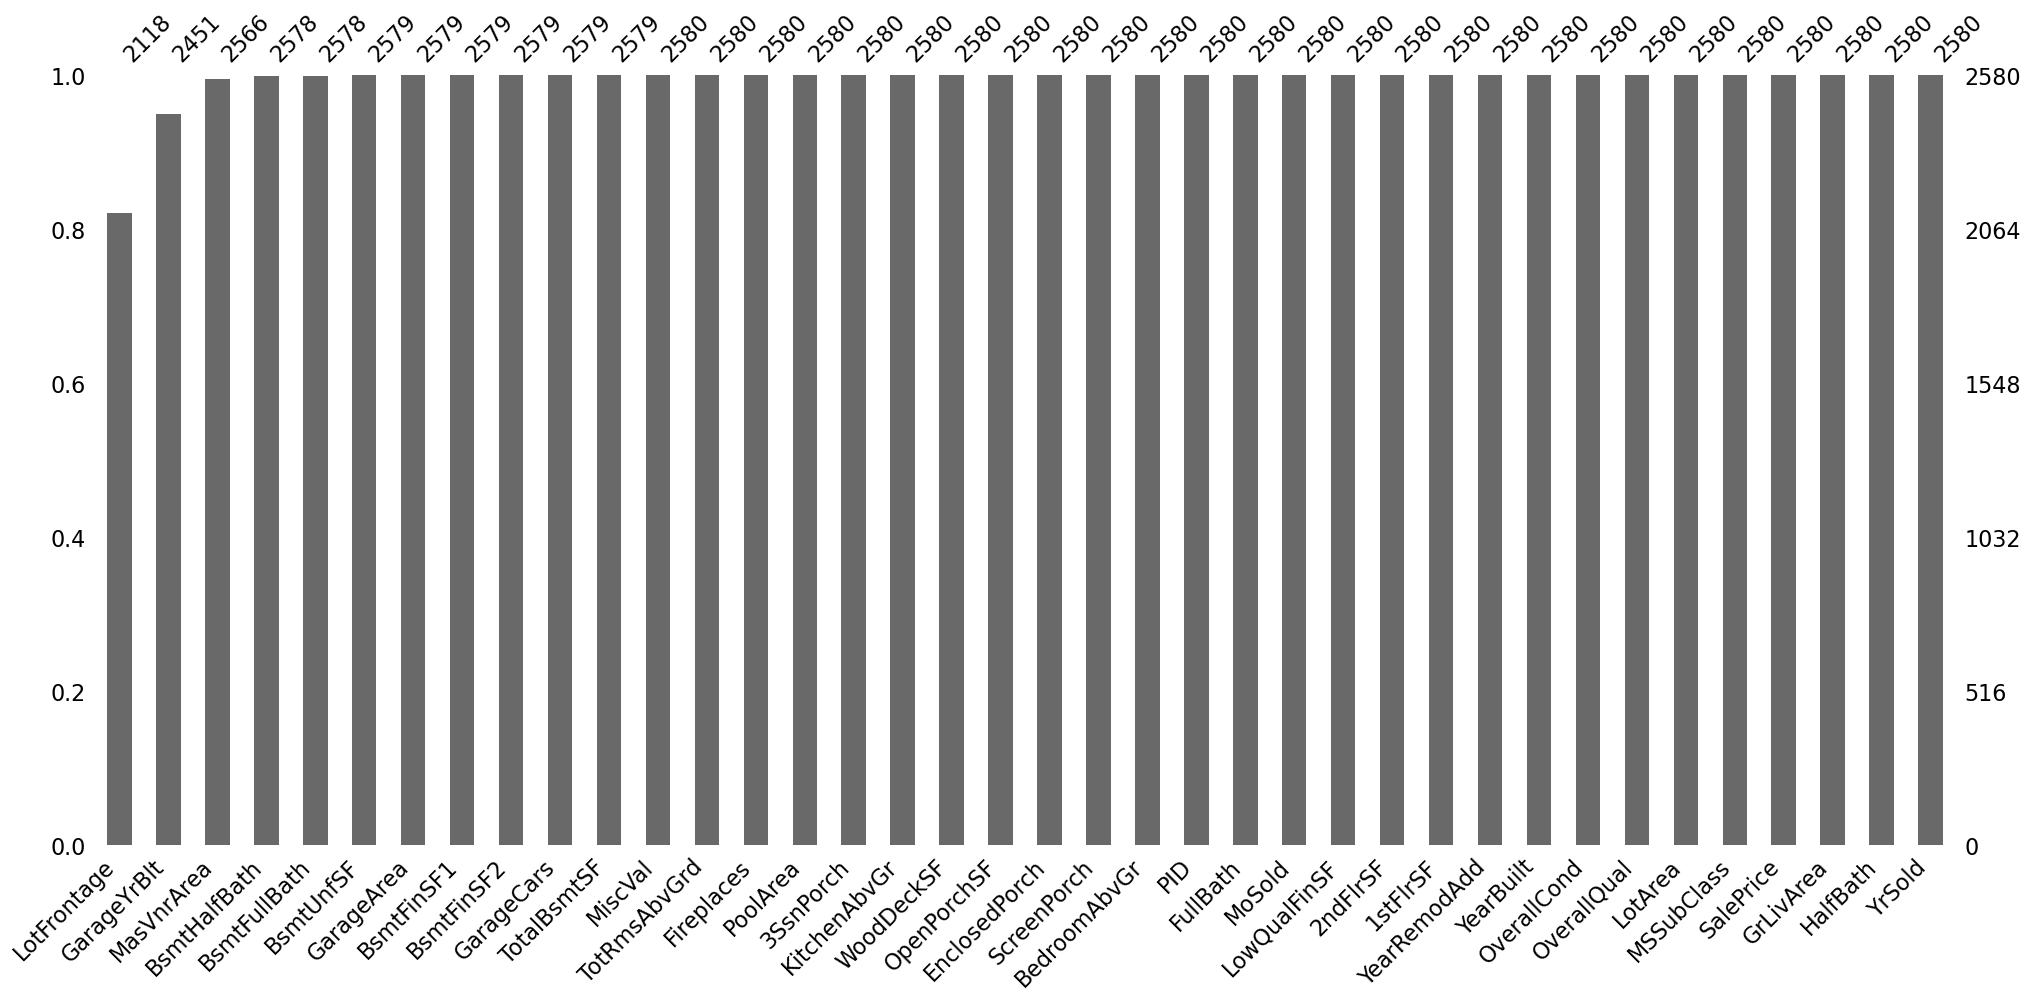

In [5]:
housing_num = housing.select_dtypes(['int64','float64']).copy()
msno.bar(housing_num, sort = 'ascending')

<Axes: >

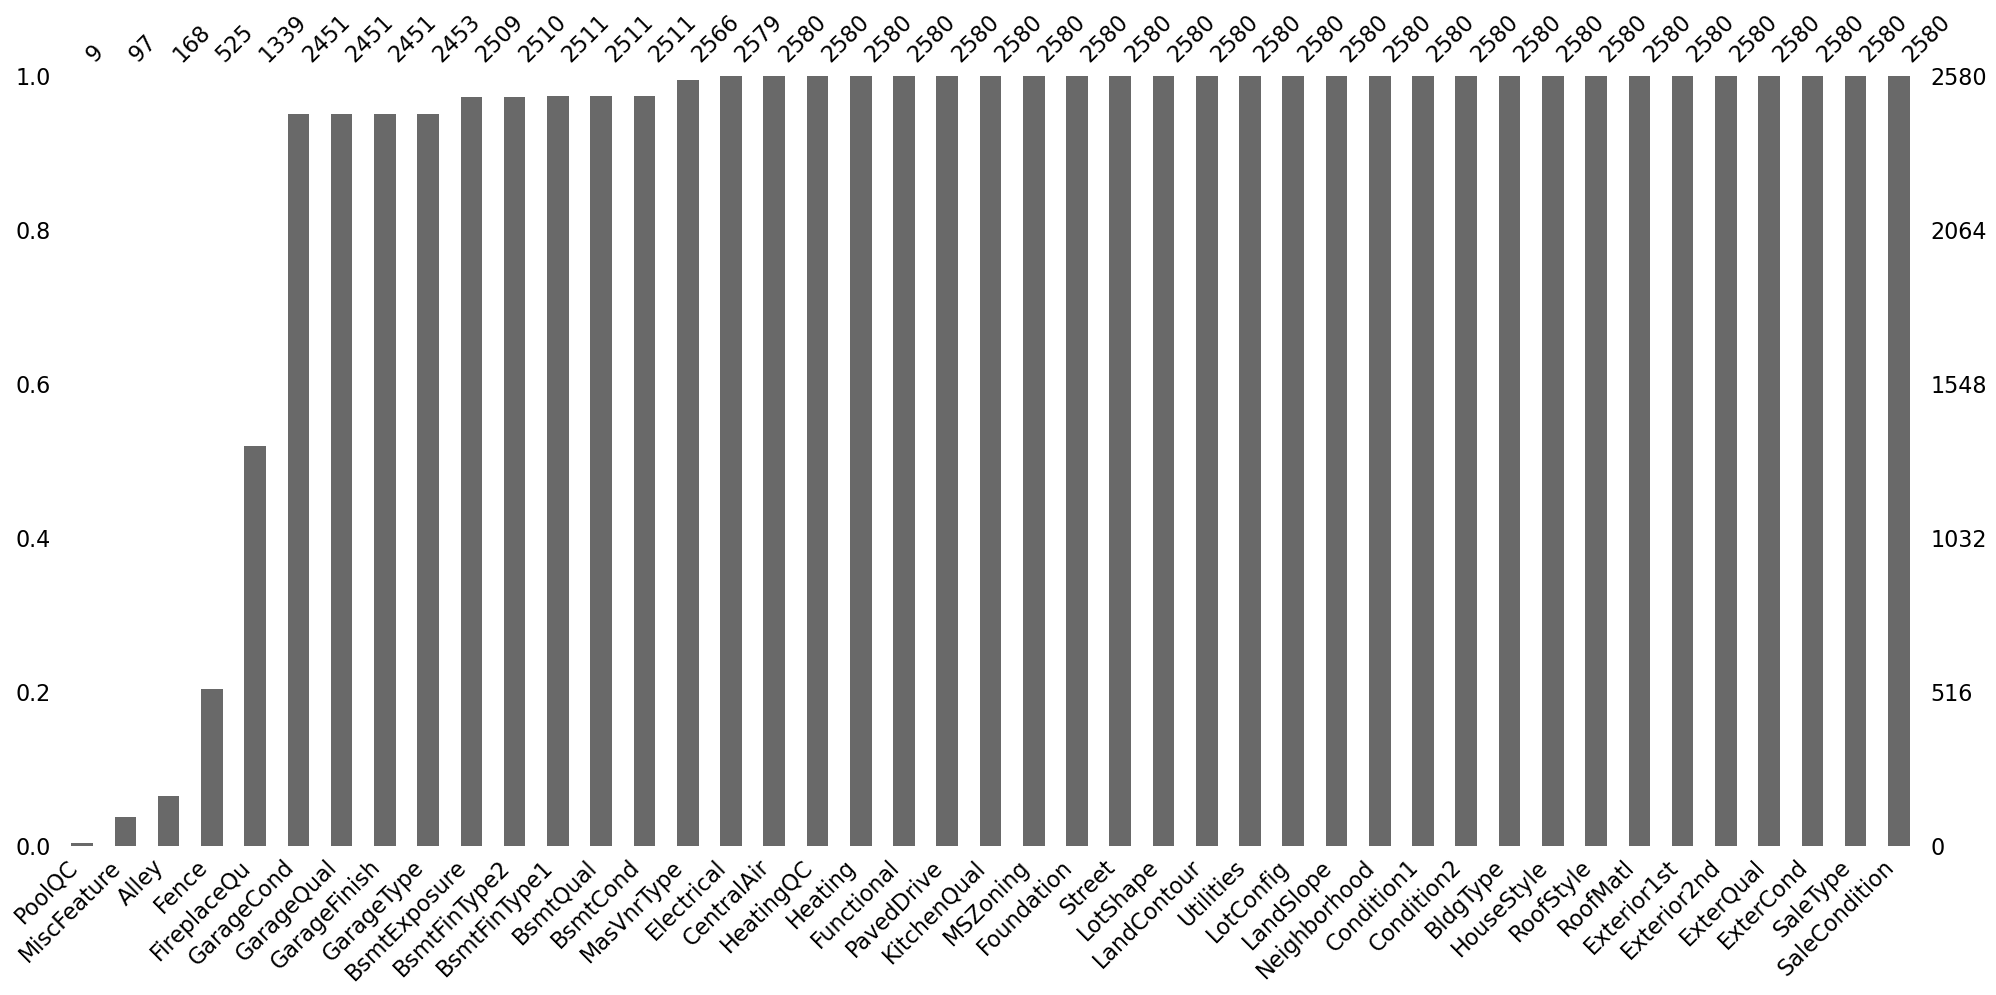

In [8]:
housing_cat = housing.select_dtypes(['object']).copy()
msno.bar(housing_cat, sort = 'ascending')

In [5]:
# Filling in the Lot Frontage with the Average Lot Frontage
# To make it better should do for each neighborhood
housing_num['LotFrontage'].fillna(housing_num['LotFrontage'].mean(), inplace = True)

# Because there is only 1 null value for area, we just fill in with the Year the house was built
housing_num.loc[housing_num['GarageArea'].isnull(), 'GarageYrBlt'] = housing_num.loc[housing_num['GarageArea'].isnull(),'YearBuilt']
housing_num['GarageArea'].fillna(housing[housing['GarageType']== 'Detchd']['GarageArea'].mean(), inplace = True)


housing_num.drop(['SalePrice','PID'],inplace=True, axis = 1)
# MsnrVrArea, TotalBsmtSF, GarageCars, BsmtHalfBath, BsmtFullBath
housing_num.fillna(0,inplace = True)
price = housing['SalePrice'].copy()

<Axes: >

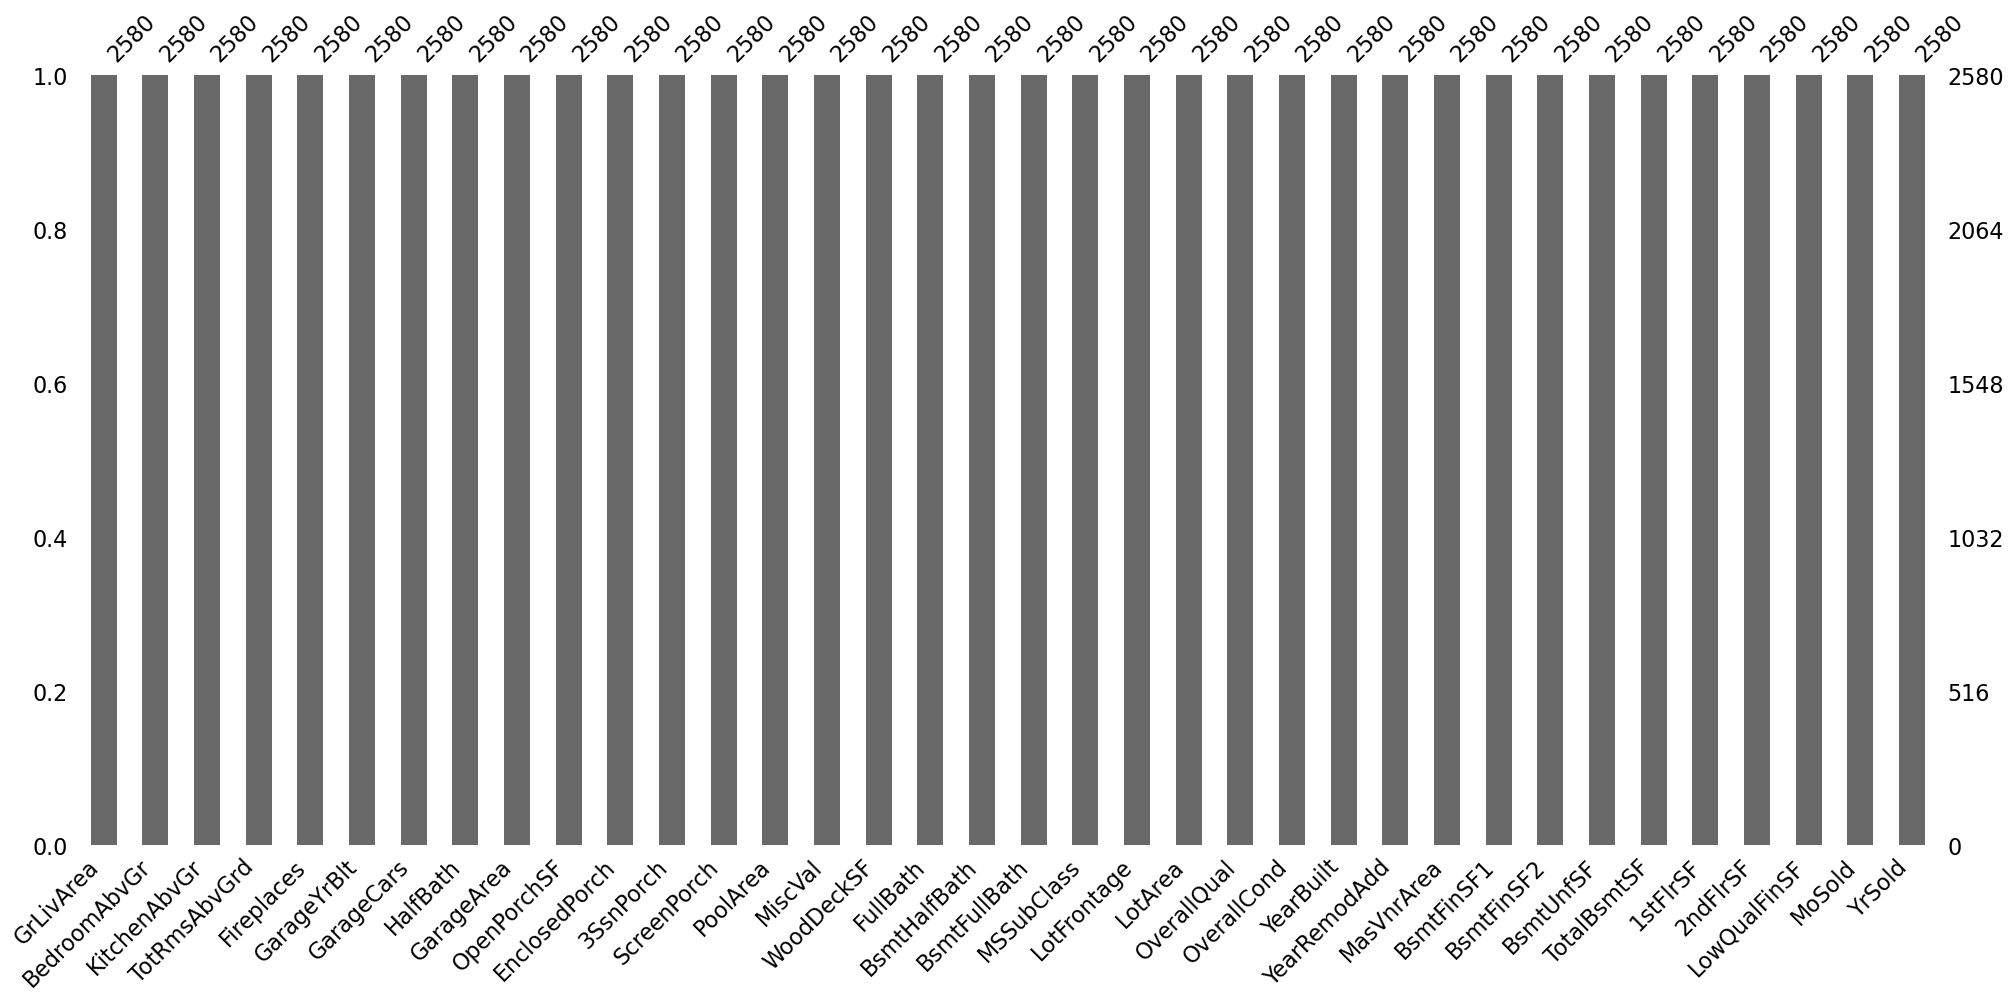

In [6]:
msno.bar(housing_num, sort = 'ascending')

In [7]:
housing_num.shape

(2580, 36)

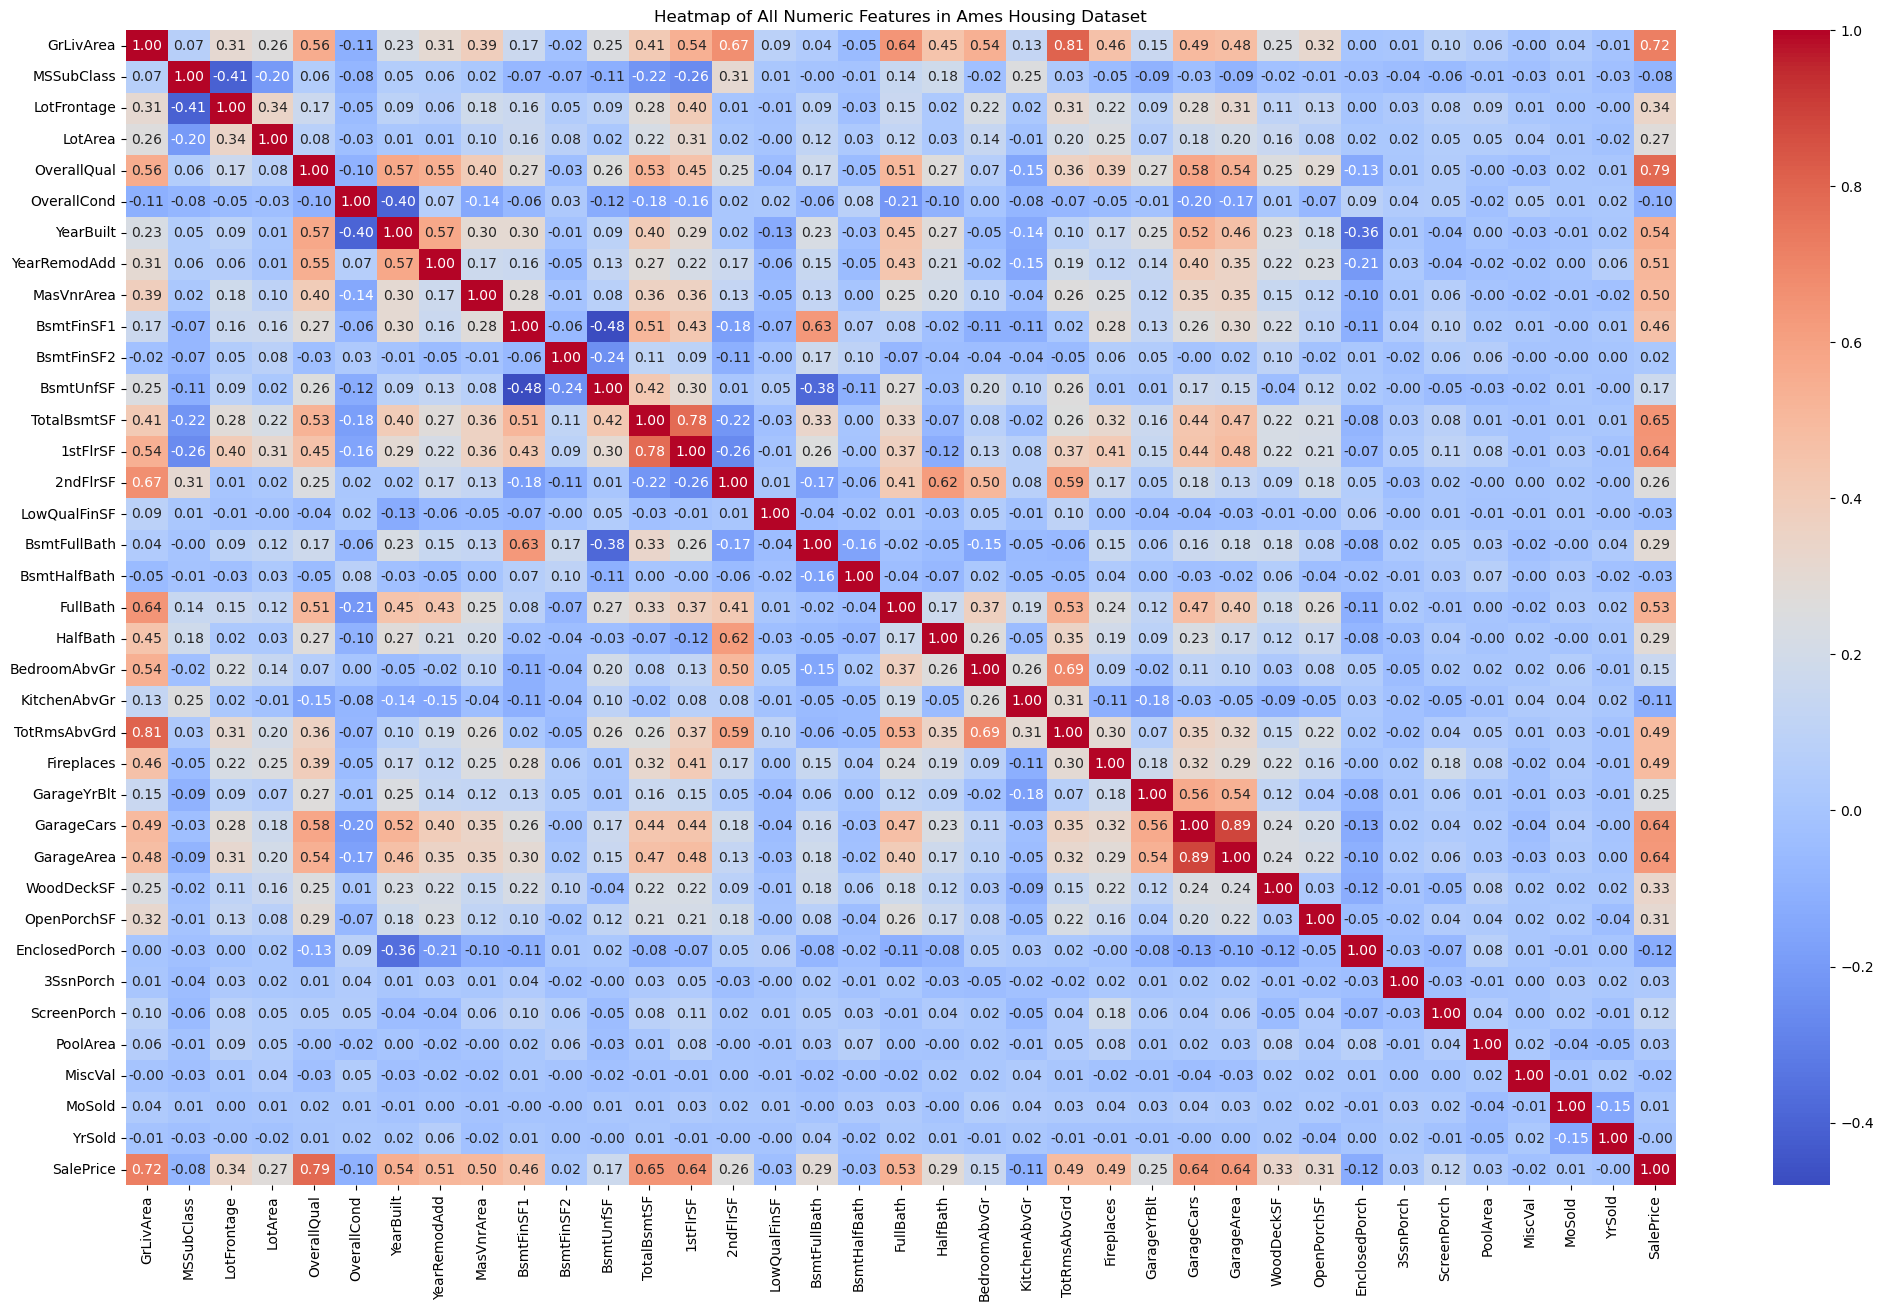

In [8]:
corr = pd.concat([housing_num, price], axis=1).corr()
plt.figure(figsize=(25, 15))
sns.heatmap(corr, annot=True,fmt=".2f",  cmap='coolwarm')
plt.title('Heatmap of All Numeric Features in Ames Housing Dataset')
plt.show()

In [9]:
# Values that seem significant
# GrLivArea, LotFrontage, OverallQual, YearBuilt,YearRemodAdd, MasVnrArea, TotalBsmtSF, 1stFlrSF, Full Bath, TotRmsAbvGrd, Fireplaces, GarageCars, GarageArea

# Value may seen significant


In [10]:
F_values, p_values = f_regression(housing_num, price)
pd.Series(p_values, index=housing_num.columns).sort_values()

GrLivArea         0.000000e+00
OverallQual       0.000000e+00
TotalBsmtSF      7.306053e-313
1stFlrSF         1.616946e-300
GarageCars       2.019046e-295
GarageArea       2.569295e-291
YearBuilt        5.149368e-199
FullBath         5.288789e-191
YearRemodAdd     3.157588e-174
MasVnrArea       4.164095e-162
TotRmsAbvGrd     4.384478e-156
Fireplaces       1.286943e-154
BsmtFinSF1       5.469112e-136
LotFrontage       3.839645e-70
WoodDeckSF        6.015295e-68
OpenPorchSF       2.930048e-57
BsmtFullBath      1.927214e-51
HalfBath          1.024216e-49
LotArea           8.303020e-46
2ndFlrSF          4.007008e-42
GarageYrBlt       7.304546e-37
BsmtUnfSF         8.441921e-18
BedroomAbvGr      9.043503e-15
EnclosedPorch     3.375427e-10
ScreenPorch       6.034979e-10
KitchenAbvGr      6.420379e-09
OverallCond       2.667977e-07
MSSubClass        1.691633e-05
BsmtHalfBath      8.620292e-02
3SsnPorch         1.124139e-01
PoolArea          1.172748e-01
LowQualFinSF      1.173873e-01
BsmtFinS

In [11]:
size_related = housing.filter(regex='SF$|Area$').copy()
size_related.fillna(0, inplace=True)
size_related.head()

,GrLivArea,LotArea,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GarageArea,WoodDeckSF,OpenPorchSF,PoolArea
1,856,7890,0.0,618.0,856.0,856,0,0,399.0,0,0,0
2,1049,4235,149.0,104.0,1049.0,1049,0,0,266.0,0,105,0
3,1001,6060,0.0,100.0,837.0,1001,0,0,216.0,154,0,0
4,1039,8146,0.0,405.0,405.0,717,322,0,281.0,0,0,0
5,1665,8400,0.0,167.0,810.0,810,855,0,528.0,0,45,0


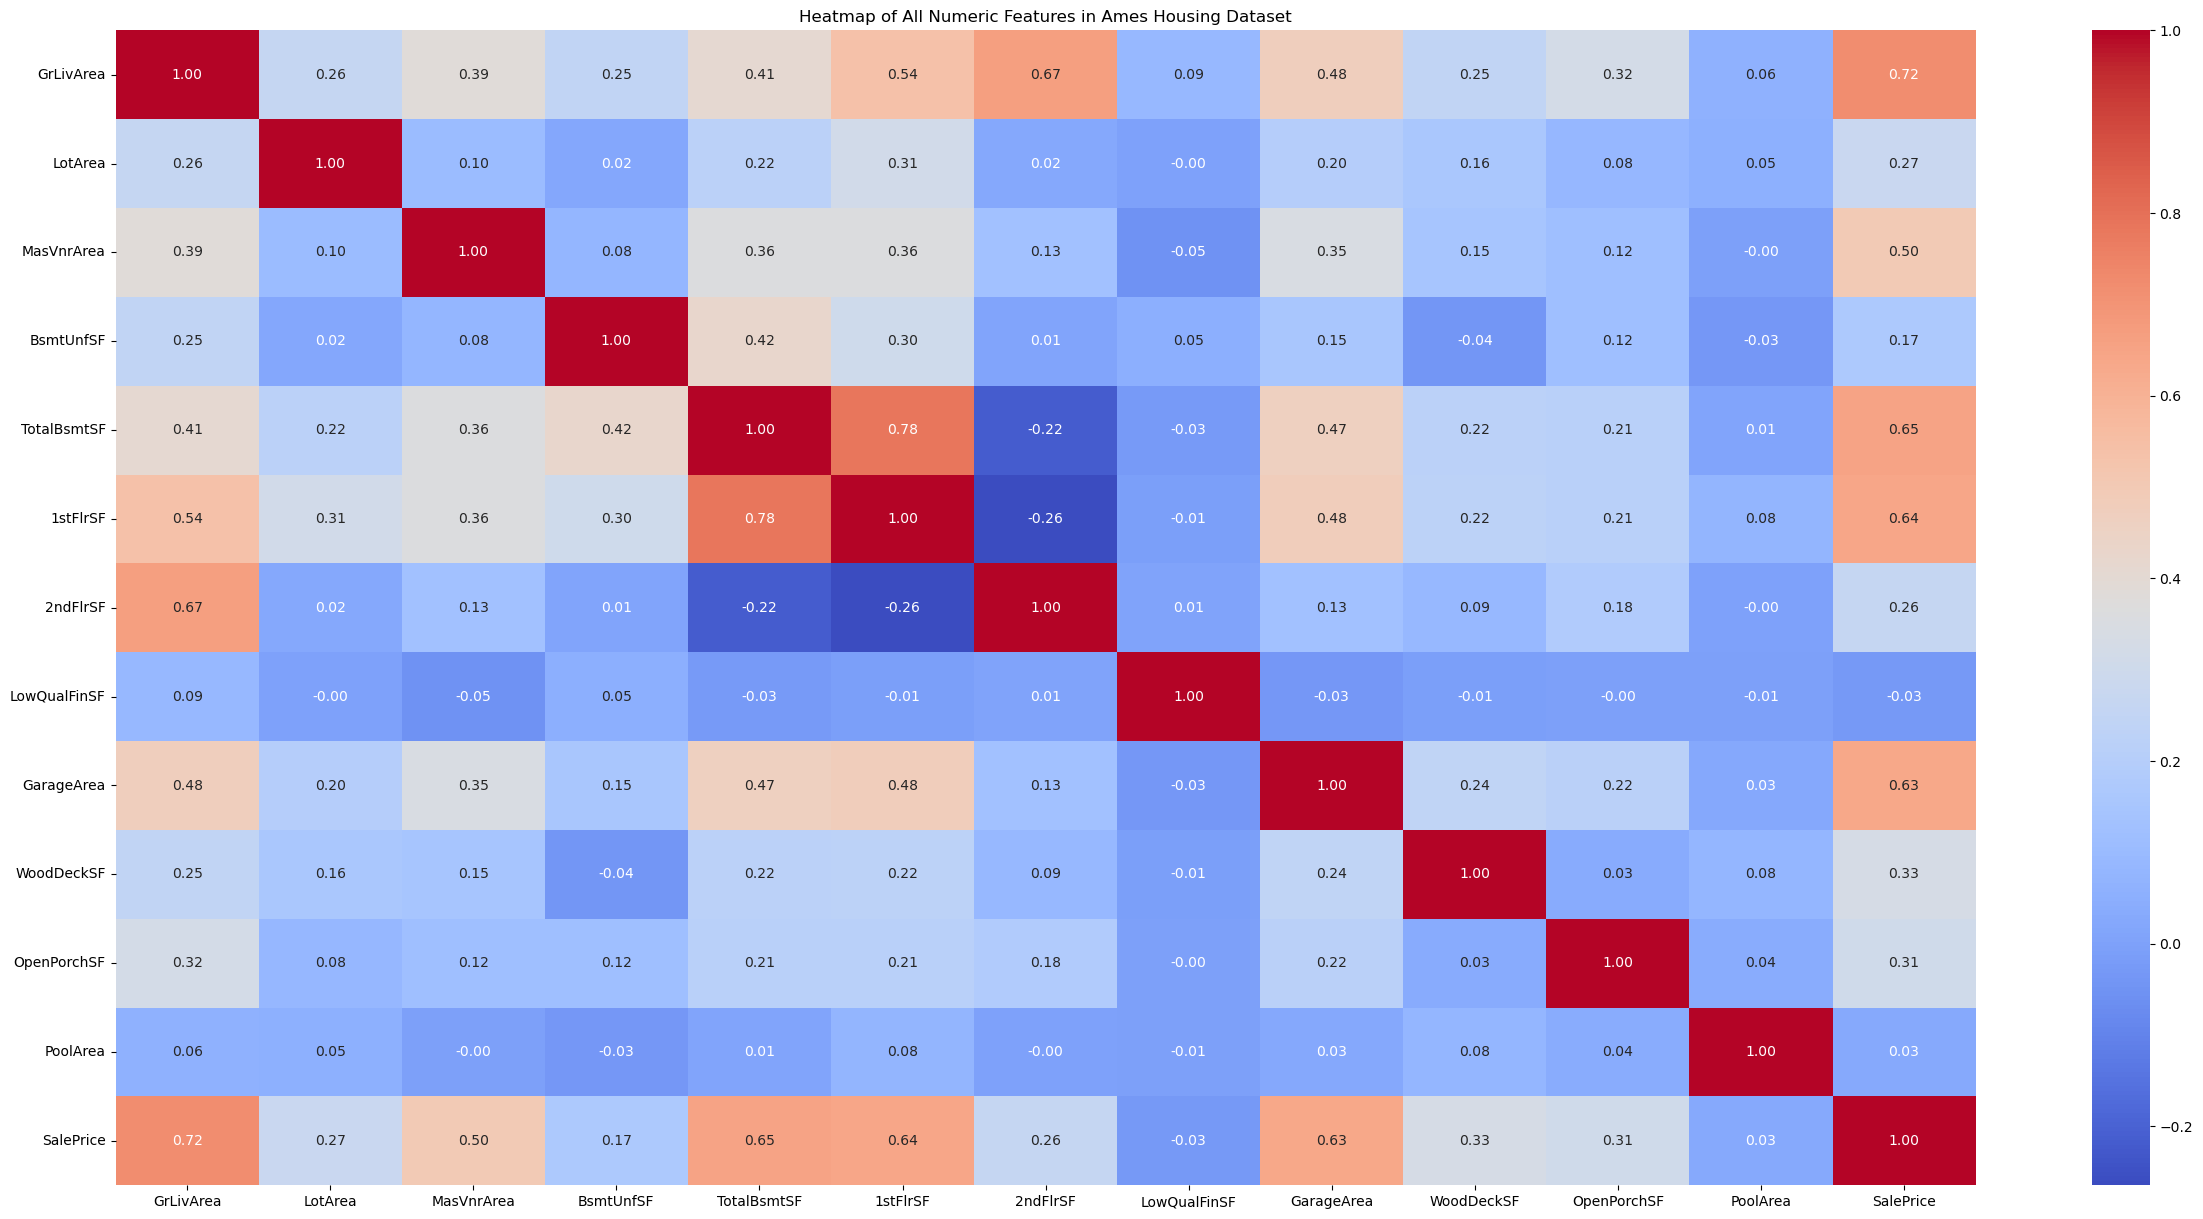

In [12]:
corr = pd.concat([size_related, price], axis=1).corr()
plt.figure(figsize=(30, 15))
sns.heatmap(corr, annot=True,fmt=".2f",  cmap='coolwarm')
plt.title('Heatmap of All Numeric Features in Ames Housing Dataset')
plt.show()

In [13]:
F_values, p_values = f_regression(size_related, price)
pd.Series(p_values, index=size_related.columns).sort_values()

GrLivArea        0.000000e+00
TotalBsmtSF     7.306053e-313
1stFlrSF        1.616946e-300
GarageArea      6.423062e-291
MasVnrArea      4.164095e-162
WoodDeckSF       6.015295e-68
OpenPorchSF      2.930048e-57
LotArea          8.303020e-46
2ndFlrSF         4.007008e-42
BsmtUnfSF        8.441921e-18
PoolArea         1.172748e-01
LowQualFinSF     1.173873e-01
dtype: float64